# Predicting Heart failure

## The dataset

The dataset used in this projects was published to Kaggle by ... in 2020? and contains hospital data from xxx patients admitted to the xxx Hospital in Pakistan between XXX and XXX with cardiac symptoms.

In [29]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Import data as .csv file

In [320]:
#Dataset imported from: https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital

HF_Dataset = 'HFDataset.csv'
HFdf_full = pd.read_csv(HF_Dataset, header=0)

For the purpose of this project, I have used a dataset downloaded from Kaggle as a .csv file to the Jupyter directory and uploaded to the local environement. Had I used a dataset from a different source, I could have used the source API to pull the dataset directly. As this is not the case here, I have included an unrelated example to showcase how I would go about accessing data using an API. I have pulled an interesting dataset using the Smart Dublin API: Fire and Ambulance Annual Incident Activity Log published by data.gov.ie


Initially used urllib library to download the file via the Smart Dublin API, however I discovered that this throws an error as Anaconda has replaced 'urllib' with 'requests'. I have imported the 'requests' library instead.

In [321]:
import requests
import pandas as pd

#define dataset url and 
url = "https://data.smartdublin.ie/api/3/action/datastore_search"
resource_id = "b9281d81-ccde-4c1e-b8db-b2b9f7e6eea8"
limit = 5

#Send get request, storing downloaded dataset as variable 'response'
response = requests.get(url, params={"resource_id": resource_id, "limit": limit})

#Extract 'results' and 'records' from the received .json file
data = response.json()
records = data["result"]["records"]

#Convert the resulting list into DataFrame for further analysis.
df2= pd.DataFrame(records)
print(df2.head())

   _id                 Date  Station Area   Description       TOC       ORD  \
0    1  2013-01-01T00:00:00   Rathfarnham     S/S OTHER  01:27:19  01:28:58   
1    2  2013-01-01T00:00:00      Tallaght      Fire CAR  01:49:57  01:50:40   
2    3  2013-01-01T00:00:00  North Strand       S/S RTA  03:35:24  03:36:14   
3    4  2013-01-01T00:00:00      Tallaght      Fire CAR  04:12:51  04:13:56   
4    5  2013-01-01T00:00:00       Finglas  Fire DOM PER  04:14:24  04:15:36   

        MOB        IA LS AH       MAV        CD  
0  01:30:47  01:58:54        01:59:02  02:05:05  
1  01:51:47  01:55:43        02:03:22  02:12:03  
2  03:38:28  03:41:20        03:59:44  04:21:07  
3  04:14:32  04:20:48        04:34:39  04:37:02  
4  04:17:37  04:20:47        04:27:30  04:33:51  


## Preliminary data analysis

In [322]:
#Use .head() method on our dataframe to take an exploratory look at what data in holds. 
print(HFdf_full.head())

   Age Age.Group  Gender Locality Marital status Life.Style Sleep Category  \
0   45     41-50  Female    RURAL        MARRIED         NO    NO     FREE   
1   51     51-60  Female    URBAN        MARRIED         NO    NO     FREE   
2   55     51-60  Female    RURAL        MARRIED        YES   YES     FREE   
3   55     51-60  Female    RURAL        MARRIED        YES   YES     FREE   
4   56     51-60  Female    RURAL        MARRIED        YES    NO     FREE   

  Depression Hyperlipi  ... oldpeak slope  ca  thal num SK  SK.React  \
0        YES       YES  ...     3.0     2   0     7   2  1        NO   
1        YES       YES  ...     1.2     2   0     7   2  1        NO   
2        YES       YES  ...     3.4     2   0     3   2  1        NO   
3        YES       YES  ...     2.0     2   1     7   3  1        NO   
4        YES       YES  ...     4.0     3   2     7   3  1        NO   

   Reaction  Mortality  Follow.Up  
0         0          0         60  
1         0          0    

In [323]:
#Use .info() method to get information on the type of data in the dataframe
print(HFdf_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Age.Group         368 non-null    object 
 2   Gender            368 non-null    object 
 3   Locality          368 non-null    object 
 4   Marital status    368 non-null    object 
 5   Life.Style        368 non-null    object 
 6   Sleep             368 non-null    object 
 7   Category          368 non-null    object 
 8   Depression        368 non-null    object 
 9   Hyperlipi         368 non-null    object 
 10  Smoking           368 non-null    object 
 11  Family.History    368 non-null    object 
 12  F.History         368 non-null    int64  
 13  Diabetes          368 non-null    int64  
 14  HTN               368 non-null    object 
 15  Allergies         368 non-null    object 
 16  BP                368 non-null    float64
 1

## Clean the Data

Not all columns are in this dataset are intuitive as to what their contained data represents. Without additional information on the dataset these columns do not provide any useful information and are dropped from further use.

In [324]:
# Drop 9 columns labled: "exang", "oldpeak", "slope", "ca", "thal", "num", "SK", "SK.React", and "Reaction" 
HFdf = HFdf_full.drop(columns = ["Life.Style", "Sleep", "F.History", "Hypersensitivity", "exang", "oldpeak", "slope", "ca", "thal", "num", "SK", "SK.React", "Reaction"])

In [325]:
#Check for missing values
HFdf.isna()

,Age,Age.Group,Gender,Locality,Marital status,Category,Depression,Hyperlipi,Smoking,Family.History,...,CO,Diagnosis,cp,trestbps,chol,fbs,restecg,thalach,Mortality,Follow.Up
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [326]:
#Count number of missing data points
HFdf.isna().sum()

Age               0
Age.Group         0
Gender            0
Locality          0
Marital status    0
Category          0
Depression        0
Hyperlipi         0
Smoking           0
Family.History    0
Diabetes          0
HTN               0
Allergies         0
BP                0
Thrombolysis      0
BGR               0
B.Urea            0
S.Cr              0
S.Sodium          0
S.Potassium       0
S.Chloride        0
C.P.K             0
CK.MB             0
ESR               0
WBC               0
RBC               0
Hemoglobin        0
P.C.V             0
M.C.V             0
M.C.H             0
M.C.H.C           0
PLATELET_COUNT    0
NEUTROPHIL        0
LYMPHO            0
MONOCYTE          0
EOSINO            0
Others            0
CO                0
Diagnosis         0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
Mortality         0
Follow.Up         0
dtype: int64

In [327]:
HFdf.isnull().sum()

Age               0
Age.Group         0
Gender            0
Locality          0
Marital status    0
Category          0
Depression        0
Hyperlipi         0
Smoking           0
Family.History    0
Diabetes          0
HTN               0
Allergies         0
BP                0
Thrombolysis      0
BGR               0
B.Urea            0
S.Cr              0
S.Sodium          0
S.Potassium       0
S.Chloride        0
C.P.K             0
CK.MB             0
ESR               0
WBC               0
RBC               0
Hemoglobin        0
P.C.V             0
M.C.V             0
M.C.H             0
M.C.H.C           0
PLATELET_COUNT    0
NEUTROPHIL        0
LYMPHO            0
MONOCYTE          0
EOSINO            0
Others            0
CO                0
Diagnosis         0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
Mortality         0
Follow.Up         0
dtype: int64

In [328]:
#Missing data points can be visualized in a matrix using the missingno package
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(HFdf)
plt.show

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 1800x720 with 2 Axes>

In [127]:
#Change datatypes from yes/no object to booolean - invert DM colunm


In [128]:

#Check for duplicates

#use WBC and BGR to filter for duplicate plts

The dataset is parsed into groups according to relevance and saved. This will promote ease of use down the line.

In [129]:
# As an alternative I can use a .groupby() method, however this would involve much more writing to pass /
# it as argument each individual column name, and would increase the possibility of errors.

#Extracted column titles as a list
titles = HFdf.columns.tolist()

In [159]:
#For ease-of use and referrence in the next I printed the index value associated with each column title
for index, item in enumerate(titles):
    print(f"{index}: {item}")

0: Age
1: Age.Group
2: Gender
3: Locality
4: Marital status
5: Category
6: Depression
7: Hyperlipi
8: Smoking
9: Family.History
10: Diabetes
11: HTN
12: Allergies
13: BP
14: Thrombolysis
15: BGR
16: B.Urea
17: S.Cr
18: S.Sodium
19: S.Potassium
20: S.Chloride
21: C.P.K
22: CK.MB
23: ESR
24: WBC
25: RBC
26: Hemoglobin
27: P.C.V
28: M.C.V
29: M.C.H
30: M.C.H.C
31: PLATELET_COUNT
32: NEUTROPHIL
33: LYMPHO
34: MONOCYTE
35: EOSINO
36: Others 
37: CO
38: Diagnosis
39: cp
40: trestbps
41: chol
42: fbs
43: restecg
44: thalach
45: Mortality
46: Follow.Up


In [168]:
#Dataframe containing demographics data
df_demog = HFdf.iloc[:, :6]

#Dataframe containing relevant past medical history data
df_pmhx = HFdf.iloc[:, 6:13]

#Dataframe containing laboratory results for blood work other than standard CBC
df_bloods_chem = HFdf.iloc[:, 15:24]

#Dataframe containing laboratory results for standard CBC blood work
df_bloods_cbc = HFdf.iloc[:, 24:36]

#Dataframe containing admissions symptom data
df_sxoa = HFdf.iloc[:, 38:45].join(HFdf.iloc[:, 13:15])

#Dataframe containing outcome data
df_outcome = HFdf.iloc[:, -2:]

Now that the dataframe is split into manageable related section, some data types need to be standardized.

In [164]:
#Custom function to change object types to boolean
def convert_to_bool(original, columns):
    """Converts object to type bool 
    Args:
        original: dataframe containing columns of type to be converted
        columns: (list): list of columns to which the function is applied 
    """
    for col in columns:
            original[col] = original[col].astype(bool)

In [165]:
#List of columns with inappropriate data types to be converted to boolean
col_list_pmhx = ["Depression", "Hyperlipi", "Smoking", "Family.History", "Diabetes", "HTN", "Allergies"]
col_list_sxoa = ["Thrombolysis"]

#pass list along with data frame to custom function
convert_to_bool(df_pmhx, col_list_pmhx)
convert_to_bool(df_sxoa, col_list_sxoa)

## Interpretation of columns with unique string data

Use ReGex to match string entries in columns containing data on symptoms present on admission ("CO") and established diagnosis ("Diagnosis")

In [329]:
#Can I make this a for loop?


#Use df[].unique() to determine all unique answers to “other”, “CO”, “Diagnosis”,
#Unique_other = HFdf["other"].unique()
Unique_CO = HFdf["CO"].unique()
Unique_Diagnosis = HFdf["Diagnosis"].unique()


In [333]:
import numpy as np
Col_unique_list = ["Others", "CO", "Diagnosis",]

for name in Col_unique_list:
    unique_content = HFdf[name].value_counts()
    print(unique_content)

no                                  201
HTN                                  53
HTN, DM                              19
PND, ORTHOPENIA                      16
IHD, SOB                             10
DM                                   10
ACS                                  10
IHD, HTN                              7
LV dysfunction                        7
CHB, RV INFARCT                       6
ICMP WITH EF= 30%,PULMONAR ODEMA      6
HCV, IHD                              6
ORTHOPENIA, PND                       6
SEIZARIAN, HYSTECTOMY.                5
IHD,DM                                2
PULMONARY ODEMA                       2
DM,M.I                                2
Name: Others, dtype: int64
Chest pain,                                      84
Chest pain, SWEATING                             23
Chest pain,vomiting, sweating                    17
Chest pain, VOMITING                             16
SOB FROM 1 DAY                                   16
CENTRAL Chest pain,              

In [334]:
#Use ReGex to filter for relevant keywords
Relevant_keywords_CO = pd.list["chest pain", "SOB"]
Relevant_keywords_Diagnosis = 
Relevant_keywords_other = 

SyntaxError: invalid syntax (<ipython-input-334-d6a9850555b0>, line 3)

Use ReGex to search freeform text column to match symptoms which were documented on admission.

In [315]:
#Use ReGex to match specific symptoms: Chest pain 

#Convert data type from object to string
As_ser = HFdf["CO"]
As_str = As_ser.astype(str).str

#Make string lowercase
As_lowerc = As_str.lower()

# Create a new column called "CO_chest_pain" to store boolean value, True if symptom present, otherwise False
HFdf["CO_chest_pain"] = As_lowerc.str.contains(r"\w*\s?chest\s?pain\w*", regex=True)

#Count unique instances of chest pain as a presenting symptom
print(HFdf["CO_chest_pain"].value_counts())

True     352
False     16
Name: CO_chest_pain, dtype: int64


In [ ]:
#Use ReGex to match specific symptoms - Sweating

In [ ]:
#Use ReGex to match specific symptoms - Nausea or Vomiting

In [5]:
#Pull only rows which did not contain either of the three presenting symptomes found by ReGex 
# Save these rows of unique atypical presentations as HFdata_df["CO_unique_atypical"]

In [ ]:
#Histogram showing percentage of pts exhibiting most common symptoms - by age group, gender.

#Maybe put this lower in with Basic stat analysis...

Use ReGex to search column containing free-form string data on established diagnosis ("Diagnosis")

In [4]:
#Use ReGex to match specific Diagnosis - A/W, .... maybe too much, not enough time ....


#Dataframe containing demographics data
df_demographics = HFdf.iloc[:, :6]

#Dataframe containing relevant past medical history data
df_pmhx = HFdf.iloc[:, 6:13]

#Dataframe containing laboratory results for blood work other than standard CBC
df_bloods_chem = HFdf.iloc[:, 15:24]

#Dataframe containing laboratory results for standard CBC blood work
df_bloods_cbc = HFdf.iloc[:, 24:36]

#Dataframe containing admissions symptom data
df_sxoa = HFdf.iloc[:, 38:45].join(HFdf.iloc[:, 13:15])

#Dataframe containing outcome data
df_outcome = HFdf.iloc[:, -2:]

## Basic Statistical Analysis 

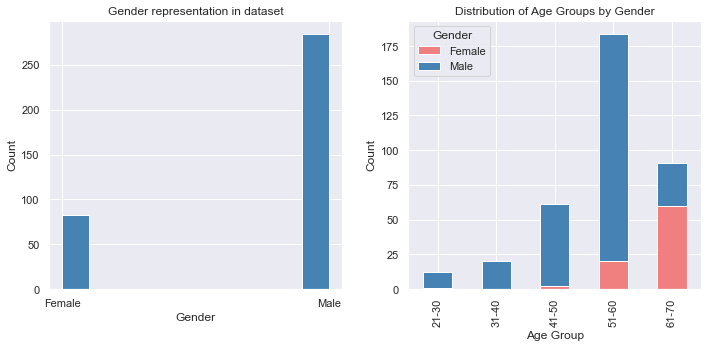

In [293]:
#Barchart showing breakdown of data by: Gender, and Age Group subgroup and gender

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax0.hist(HFdf["Gender"], color="steelblue")
ax0.set_xlabel("Gender")
ax0.set_ylabel("Count")
ax0.set_title("Gender representation in dataset")

age_group_order = ["21-30", "31-40", "41-50", "51-60", "61-70"]
grouped = HFdf.groupby(["Age.Group", "Gender"])
counts = grouped.size().unstack()
colours = ["lightcoral", "steelblue"]

counts.plot(kind="bar", stacked=True, color=colours, ax=ax1)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Groups by Gender")
plt.tight_layout(h_pad=2.0, w_pad=2.0)
plt.show()


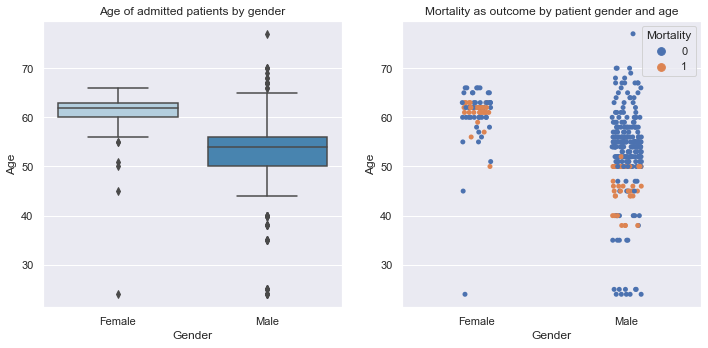

In [308]:
#Boxplot and stripplot showing breakdown of dataset for mortality by: Gender and Age

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.set()
#colours = ["brown", "steelblue"]
sns.boxplot(data=HFdf, x="Gender", y="Age", palette="Blues", ax=ax0)
ax0.set_title("Age of admitted patients by gender")
sns.stripplot(data=HFdf, x="Gender", y="Age", hue="Mortality", jitter=True, ax=ax1)
ax1.set_title("Mortality as outcome by patient gender and age")
plt.tight_layout(h_pad=2.0, w_pad=2.0)
plt.show()

In [7]:
#MOrtality by Age.Group and location

In [8]:
#Mortality hist? correlation? by comorbidity : Depression, Hyperlipidemia, Smoking, DM, HTN

In [9]:
#Correlation: BP, BGR - scatter

In [10]:
#Correlation: Bloods Chem?

In [11]:
#Correlation:Diagnosis? - if regex done

In [12]:
#Correlation: CP value ******** linear regression

In [13]:
#Correlation: Followup? - maybe

## Machine Learning

Using a supervised learning algorythm, 

In [17]:
#...

Hyperparameter tuning

In [16]:
#...